数据预处理(准备工作):

loadDataSet: 读取样本集,转换成array

calDist: 求两个向量的欧氏距离

randCent: 随机初始化簇心

In [6]:
import pandas as pd
import numpy as np
from math import *
import random 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def loadDataSet(filename):
    df=pd.read_csv(filename,sep='\t',header=None)
    return df.to_numpy()

#cnt 存储每次训练结果png的编号
def plotDataSet(dataMat,cnt,centroids=None,clusterAssess=None):
    colors=['green','red','black','brown']
    fig,ax=plt.subplots()
    if(centroids is None):
        ax.scatter(dataMat[:,0],dataMat[:,1])
    else:
        colorsList=[colors[int(x)] for x in clusterAssess[:,0]]
        ax.scatter(dataMat[:,0],dataMat[:,1],color=colorsList)
        ax.scatter(centroids[:,0],centroids[:,1],color='blue',marker='x')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    plt.savefig(f"kmeans{cnt}")
    
    
def calDist(vecA,vecB):
    return sqrt(sum(np.power(vecA-vecB,2)))


def randCent(dataMat,k):
    m,n=dataMat.shape
    centroids=np.zeros((k,n))
    for i in range(n):
        #print(min(dataMat[:,i]),max(dataMat[:,i]))
        dataMin=min(dataMat[:,i])
        dataMax=max(dataMat[:,i])
        # 为每个簇心随机生成[dataMin,dataMax]的坐标
        for j in range(k):
            centroids[j,i]=random.uniform(dataMin,dataMax)
    return centroids

In [7]:
from operator import itemgetter
def KMeans(dataMat,k,calDis=calDist,creatCent=randCent):
    m,n=dataMat.shape
    # clusterAssess 一列记录簇索引，一列记录误差（距离簇心距离）
    clusterAssess=np.zeros((m,2))
    centroids=creatCent(dataMat,k)
    flag=True
    cnt=1
    while flag:
        flag=False
        # 循环遍历每个数据点
        for i in range(m):
            bestDis=inf
            bestIndex=-1
            # 循环遍历每个簇心，寻找距离最短的
            for j in range(k):
                dis=calDis(dataMat[i],centroids[j])
                if(dis<bestDis):
                    bestDis=dis
                    bestIndex=j
            if(bestIndex!=clusterAssess[i][0]):flag=True
            clusterAssess[i]=[bestIndex,bestDis**2]
        # 重新计算簇心坐标
        for i in range(k):
            filterDataMat=dataMat[clusterAssess[:,0]==i]
            centroids[i]=np.mean(filterDataMat,axis=0)
        plotDataSet(dataMat,cnt,centroids,clusterAssess)
        cnt+=1
    return centroids,clusterAssess

costJ :

利用SSE(平方距离和）指标衡量聚类性能好坏

In [11]:
def costJ(clusterAssess):
    return np.sum(clusterAssess[:,1])

150.62604907269227

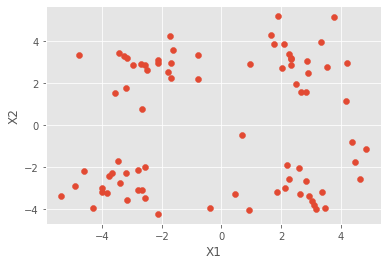

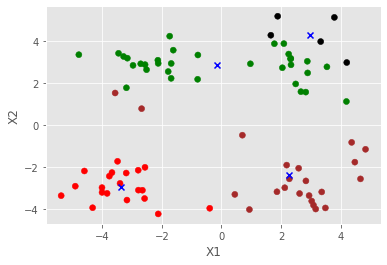

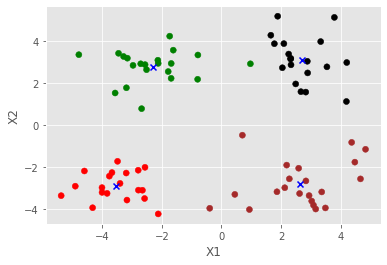

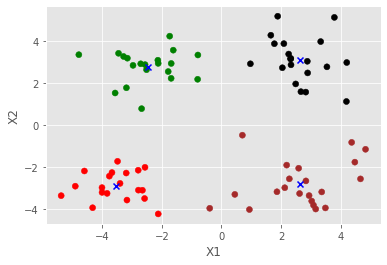

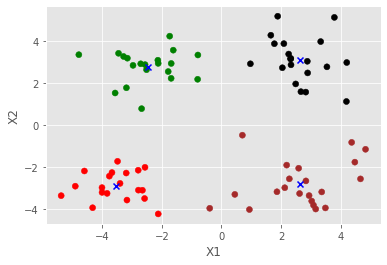

In [22]:
dataMat=loadDataSet("testSet.txt")
#calDist(dataMat[0],dataMat[1])
centroids=randCent(dataMat,4)
#print(centroids)
plotDataSet(dataMat,0)
centroids,clusterAssess=KMeans(dataMat,4)
costJ(clusterAssess)